In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

In [142]:
#import train_data and test_data
train_dataset=pd.read_csv("train_skl.csv")
test_dataset=pd.read_csv("test_skl.csv")
vaild_dataset=pd.read_csv("vaild_ans_skl.csv")

In [143]:
#train_data
print (train_dataset.shape)
train_dataset.describe()

(4413, 21)


,Id,CityCode,UseYear,RoadWide,RegisterReason,MaterialCode,BuildTotalLevel,BuildLevel,buildRate,UsedState,...,StallNum,StallAreaSize,TotalAreaSize,ColAreaCode,RegisterPurpose1,RegisterPurpose2,RegisterPurpose3,RegisterPurpose4,landSize,IdenPrice
count,4413.000000,4.413000e+03,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,...,4413.000000,4413.000000,4413.000000,2996.000000,4413.000000,4413.000000,4413.000000,4413.000000,4413.000000,4.413000e+03
mean,2207.000000,6.221900e+06,26.914344,10.743070,2.405846,4.809653,7.264673,1.434111,9.968502,1.846590,...,0.208928,3.444405,38.998081,2.535714,11.839989,1.045370,3.927131,0.040795,17.657999,1.104167e+07
std,1274.067698,7.669379e+06,11.238106,7.459534,1.272497,4.108405,5.652262,23.894368,13.422004,2.075695,...,0.469700,121.930799,30.639407,8.901261,8.550017,1.083238,48.033757,0.435977,25.447795,1.151199e+07
min,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.542000e+05
25%,1104.000000,1.329400e+06,20.000000,6.000000,2.000000,4.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,26.060000,1.000000,7.230000,0.270000,0.000000,0.000000,6.500000,5.106000e+06
50%,2207.000000,4.195800e+06,25.000000,8.000000,2.000000,4.000000,5.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,34.040000,1.000000,9.050000,0.940000,0.180000,0.000000,10.330000,7.800710e+06
75%,3310.000000,8.524500e+06,36.000000,12.000000,2.000000,4.000000,11.000000,0.000000,20.000000,1.000000,...,0.000000,0.000000,47.300000,2.000000,14.010000,1.400000,2.170000,0.000000,24.500000,1.266224e+07
max,4413.000000,1.419600e+08,96.000000,80.000000,6.000000,99.000000,99.000000,646.910000,99.000000,9.000000,...,5.000000,8097.000000,915.410000,99.000000,188.380000,17.340000,1451.280000,13.600000,737.430000,1.665440e+08


In [144]:
train_dataset.head()

,Id,CityCode,UseYear,RoadWide,RegisterReason,MaterialCode,BuildTotalLevel,BuildLevel,buildRate,UsedState,...,StallNum,StallAreaSize,TotalAreaSize,ColAreaCode,RegisterPurpose1,RegisterPurpose2,RegisterPurpose3,RegisterPurpose4,landSize,IdenPrice
0,1,2627520,29,12.0,2,4,7,0.00,21,1,...,0,0.00,19.32,NaN,9.44,0.92,2.74,0.00,7.24,5855040
1,2,0,29,12.0,2,4,7,0.00,21,1,...,0,2.32,2.32,NaN,9.44,0.92,2.74,0.00,7.24,5855040
2,3,0,29,12.0,2,4,7,0.00,21,1,...,1,2.32,2.32,NaN,9.44,0.92,2.74,0.00,7.24,5855040
3,4,2627520,29,12.0,2,4,7,0.00,21,1,...,0,0.00,19.32,NaN,9.44,0.92,2.74,0.00,7.24,5855040
4,5,0,22,10.0,2,4,16,0.09,6,1,...,1,12.49,0.00,1.0,10.93,1.32,0.79,3.69,7.16,21404000


In [145]:
#train_data columns
print (train_dataset.columns)

Index(['Id', 'CityCode', 'UseYear', 'RoadWide', 'RegisterReason',
       'MaterialCode', 'BuildTotalLevel', 'BuildLevel', 'buildRate',
       'UsedState', 'StallPrice', 'StallNum', 'StallAreaSize', 'TotalAreaSize',
       'ColAreaCode', 'RegisterPurpose1', 'RegisterPurpose2',
       'RegisterPurpose3', 'RegisterPurpose4', 'landSize', 'IdenPrice'],
      dtype='object')


In [146]:
#show train col info
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4413 entries, 0 to 4412
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                4413 non-null   int64  
 1   CityCode          4413 non-null   int64  
 2   UseYear           4413 non-null   int64  
 3   RoadWide          4413 non-null   float64
 4   RegisterReason    4413 non-null   int64  
 5   MaterialCode      4413 non-null   int64  
 6   BuildTotalLevel   4413 non-null   int64  
 7   BuildLevel        4413 non-null   float64
 8   buildRate         4413 non-null   int64  
 9   UsedState         4413 non-null   int64  
 10  StallPrice        4413 non-null   int64  
 11  StallNum          4413 non-null   int64  
 12  StallAreaSize     4413 non-null   float64
 13  TotalAreaSize     4413 non-null   float64
 14  ColAreaCode       2996 non-null   float64
 15  RegisterPurpose1  4413 non-null   float64
 16  RegisterPurpose2  4413 non-null   float64


In [147]:
#test_data
print (test_dataset.shape)
test_dataset.describe()

(831, 20)


,Id,CityCode,UseYear,RoadWide,RegisterReason,MaterialCode,BuildTotalLevel,BuildLevel,buildRate,UsedState,StallPrice,StallNum,StallAreaSize,TotalAreaSize,ColAreaCode,RegisterPurpose1,RegisterPurpose2,RegisterPurpose3,RegisterPurpose4,landSize
count,831.000000,8.310000e+02,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,8.310000e+02,831.000000,831.000000,831.000000,554.000000,831.000000,831.000000,831.000000,831.000000,831.000000
mean,5416.000000,6.667055e+06,27.040915,10.414561,2.518652,4.835138,7.548736,0.590337,9.842359,1.466907,2.595066e+05,0.342960,1.659326,39.821324,4.382671,11.880096,1.202912,2.662599,0.021348,18.153189
std,240.033331,7.609024e+06,11.876909,6.823677,3.578965,4.912538,6.162633,1.336483,12.378292,1.307458,6.814760e+05,3.493756,3.960115,23.730754,15.827784,7.456526,1.196308,28.191032,0.229117,21.727693
min,5001.000000,0.000000e+00,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.940000
25%,5208.500000,1.761770e+06,20.000000,6.000000,2.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,25.725000,1.000000,7.320000,0.475000,0.000000,0.000000,6.195000
50%,5416.000000,4.499820e+06,26.000000,8.000000,2.000000,4.000000,5.000000,0.000000,2.000000,1.000000,0.000000e+00,0.000000,0.000000,35.170000,1.000000,9.800000,1.000000,0.220000,0.000000,9.980000
75%,5623.500000,9.282900e+06,36.000000,12.000000,2.000000,4.000000,12.000000,0.000000,20.000000,1.000000,0.000000e+00,0.000000,0.000000,49.990000,2.000000,14.305000,1.540000,2.245000,0.000000,24.200000
max,5831.000000,7.468680e+07,88.000000,70.000000,99.000000,99.000000,99.000000,9.800000,99.000000,9.000000,7.500000e+06,100.000000,32.440000,151.530000,99.000000,51.350000,7.960000,575.100000,3.010000,311.270000


In [148]:
test_dataset.head()

,Id,CityCode,UseYear,RoadWide,RegisterReason,MaterialCode,BuildTotalLevel,BuildLevel,buildRate,UsedState,StallPrice,StallNum,StallAreaSize,TotalAreaSize,ColAreaCode,RegisterPurpose1,RegisterPurpose2,RegisterPurpose3,RegisterPurpose4,landSize
0,5001,1549500,29,6.0,2,4,4,0.0,0,1,0,0,0.0,51.65,4.0,14.58,1.05,0.00,0.0,21.34
1,5002,25511500,15,8.0,2,4,5,0.0,0,1,0,0,0.0,72.89,1.0,20.44,1.61,0.00,0.0,29.66
2,5003,5866700,21,8.0,2,4,12,0.0,20,1,0,0,0.0,34.51,2.0,7.25,1.09,2.09,0.0,3.93
3,5004,10401600,23,5.0,2,4,6,0.0,16,1,0,0,0.0,31.52,1.0,7.40,0.63,1.51,0.0,7.00
4,5005,34792800,26,30.0,2,4,15,0.0,26,1,0,0,0.0,45.78,1.0,11.29,1.22,4.35,0.0,10.57


In [149]:
#missing value

missdf=pd.concat([train_dataset.isnull().sum(),test_dataset.isnull().sum()],keys=['train_data', 'test_data'],axis =1)
missdf[missdf.sum(axis=1)>0.]

,train_data,test_data
ColAreaCode,1417,277.0


In [150]:
#SalePrice
train_dataset["IdenPrice"].describe()

count    4.413000e+03
mean     1.104167e+07
std      1.151199e+07
min      1.542000e+05
25%      5.106000e+06
50%      7.800710e+06
75%      1.266224e+07
max      1.665440e+08
Name: IdenPrice, dtype: float64

In [151]:
#correlation
numeric_features=train_dataset.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                    int64
CityCode              int64
UseYear               int64
RoadWide            float64
RegisterReason        int64
MaterialCode          int64
BuildTotalLevel       int64
BuildLevel          float64
buildRate             int64
UsedState             int64
StallPrice            int64
StallNum              int64
StallAreaSize       float64
TotalAreaSize       float64
ColAreaCode         float64
RegisterPurpose1    float64
RegisterPurpose2    float64
RegisterPurpose3    float64
RegisterPurpose4    float64
landSize            float64
IdenPrice             int64
dtype: object

In [152]:
corr=numeric_features.corr()
print (corr['IdenPrice'].sort_values()[:])

ColAreaCode        -0.064019
RegisterPurpose3   -0.006846
UseYear            -0.004707
buildRate          -0.004562
RegisterPurpose4   -0.003698
BuildLevel         -0.001434
RegisterReason      0.000361
StallAreaSize       0.003642
Id                  0.037760
BuildTotalLevel     0.067059
UsedState           0.086927
StallNum            0.087078
landSize            0.124478
MaterialCode        0.135896
TotalAreaSize       0.147116
RegisterPurpose2    0.201522
StallPrice          0.226829
RoadWide            0.259867
RegisterPurpose1    0.493017
CityCode            0.550704
IdenPrice           1.000000
Name: IdenPrice, dtype: float64


Index(['IdenPrice', 'CityCode', 'RegisterPurpose1', 'RoadWide', 'StallPrice',
       'RegisterPurpose2', 'TotalAreaSize', 'MaterialCode', 'landSize',
       'StallNum', 'UsedState', 'BuildTotalLevel', 'Id', 'StallAreaSize',
       'RegisterReason'],
      dtype='object')


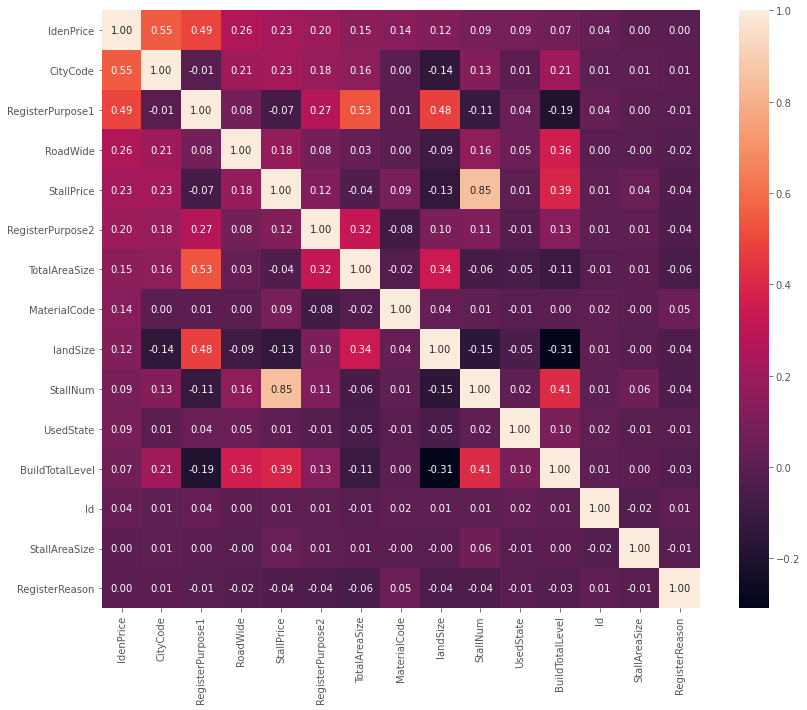

In [153]:
#相關性分析
corrmat = train_dataset.corr()
k = 15
cols = corrmat.nlargest(k, 'IdenPrice')['IdenPrice'].index
print(cols)
cm = train_dataset[cols].corr()
f, ax = plt.subplots(figsize=(14, 11))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f')
plt.show()

In [154]:
#train model
from sklearn.model_selection import train_test_split
X1=train_dataset.select_dtypes(include=[np.number]).fillna(0)
X=X1.drop(['IdenPrice','Id'],axis=1)
y=train_dataset.IdenPrice

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(3089, 19)
(1324, 19)
(3089,)
(1324,)


In [156]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [157]:
#pred price
y_pred=lr.predict(X_test)

Text(0, 0.5, 'Actual')

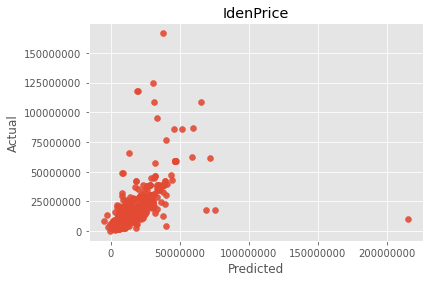

In [158]:
plt.style.use("ggplot")
actual_value=y_test
plt.scatter(y_pred,actual_value,alpha=0.9)
plt.rcParams["figure.figsize"] =(15, 15)
plt.ticklabel_format(style='plain')
plt.title("IdenPrice")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [159]:
from sklearn.metrics import mean_squared_error

In [160]:
#RSME
print ('RSME is : ',np.sqrt(mean_squared_error(y_test,y_pred)))

RSME is :  10353629.380441867


In [161]:
#R Squared
print ('R Squared is : ',1- mean_squared_error(y_test,y_pred)/ np.var(y_test))

R Squared is :  0.35957264509879217


In [162]:
#train model with xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [163]:
model= XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
y_pred=model.predict(X_test)

Text(0, 0.5, 'Actual')

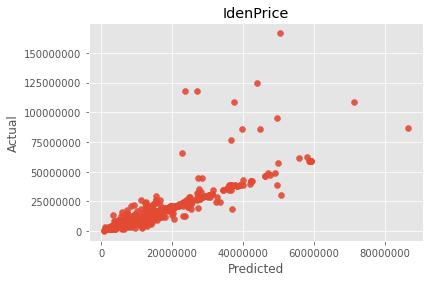

In [165]:
plt.scatter(y_pred,actual_value,alpha=0.9)
plt.rcParams["figure.figsize"] =(15, 15)
plt.ticklabel_format(style='plain')
plt.title("IdenPrice")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [166]:
#RSME
print ('RSME is : ',np.sqrt(mean_squared_error(y_test,y_pred)))

RSME is :  6765913.828730838


In [167]:
#R Squared
print ('R Squared is : ',1- mean_squared_error(y_test,y_pred)/ np.var(y_test))

R Squared is :  0.7265124449653306


In [168]:
print(model.feature_importances_)

[0.17950124 0.02033034 0.02239445 0.00317725 0.01188602 0.01725427
 0.04283511 0.00640222 0.07631245 0.10505209 0.03349821 0.01012114
 0.0340121  0.04948738 0.3454401  0.01593069 0.00749371 0.00209306
 0.01677825]


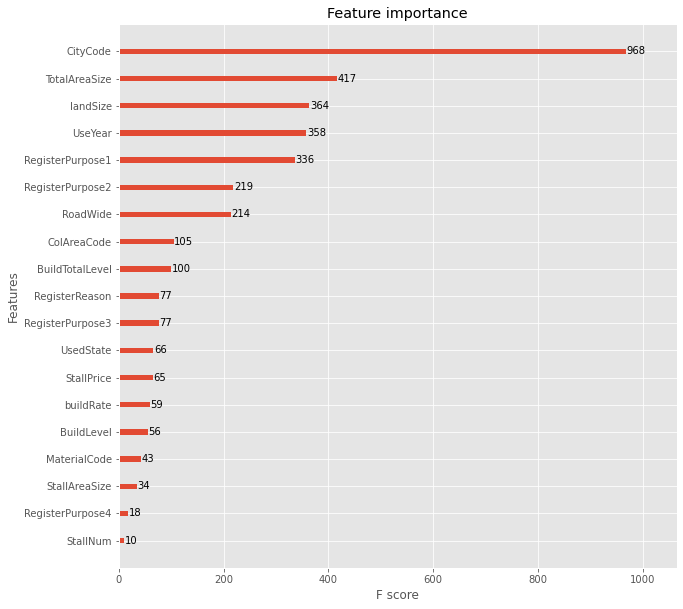

In [169]:
from xgboost import plot_importance
ax=plot_importance(model)
fig=ax.figure
fig.set_size_inches(10,10)


In [170]:
answer=pd.DataFrame()
answer['Id']=test_dataset.Id
feats=test_dataset.select_dtypes(include=[np.number]).drop(['Id'],axis=1).fillna(0)
pred_f=model.predict(feats)

#exp()
pred_result=pred_f
print (pred_f[:5])
print (pred_result[:5])

[ 4291429.5 25291446.   6084749.5 10224170.  36705960. ]
[ 4291429.5 25291446.   6084749.5 10224170.  36705960. ]


In [171]:
answer['IdenPrice']=pred_result
answer.head()

,Id,IdenPrice
0,5001,4291429.5
1,5002,25291446.0
2,5003,6084749.5
3,5004,10224170.0
4,5005,36705960.0


In [172]:
#export the result file
answer.to_csv("Result_skl.csv",index=False)

Text(0, 0.5, 'Actual')

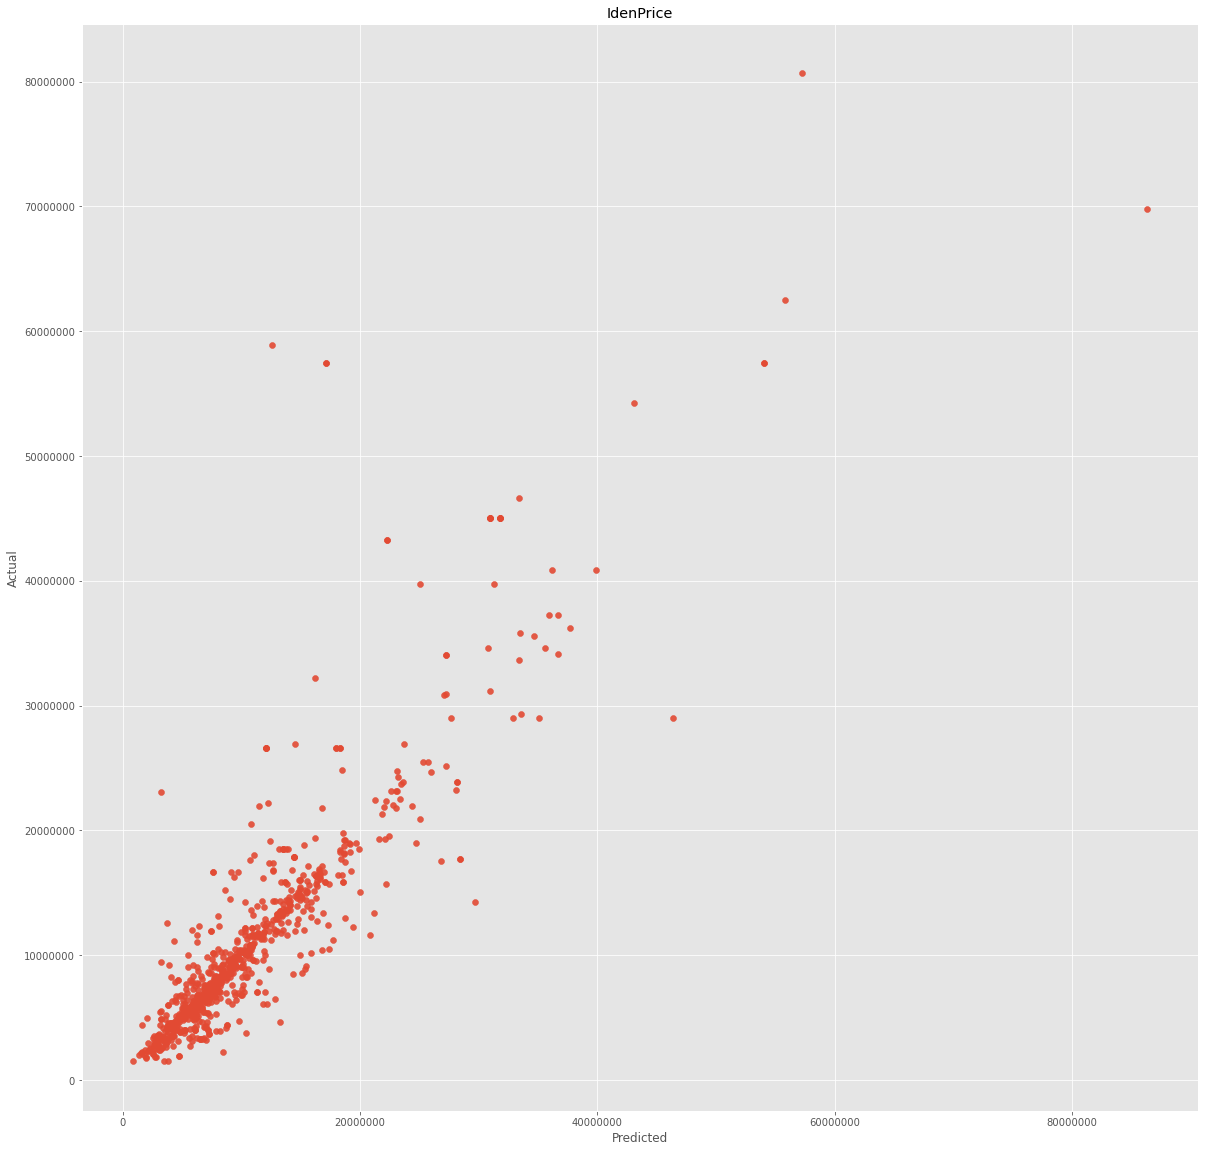

In [176]:
vaild_data =vaild_dataset.IdenPrice
plt.scatter(pred_result,vaild_data,alpha=0.9)
plt.rcParams["figure.figsize"] =(15, 15)
plt.ticklabel_format(style='plain')
plt.title("IdenPrice")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [174]:
#RSME
print ('RSME is : ',np.sqrt(mean_squared_error(vaild_data,pred_result)))

RSME is :  4425863.9977129195


In [175]:
#R Squared
print ('R Squared is : ',1- mean_squared_error(vaild_data,pred_result)/ np.var(vaild_data))

R Squared is :  0.7805602778046592
